<a href="https://colab.research.google.com/github/boazgajja/-Realtime-Ecommerce-Data-Pipeline-Analaytics-Dashboard/blob/main/simple_lenear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analytic Solution:
Intercept (Beta 0): 1.2363636363636363
Slope (Beta 1): 1.1696969696969697
SSE: 5.624242424242423
R^2: 0.952538038613988

Gradient Descent Solution:
Intercept (Beta 0): 1.175803611388339
Slope (Beta 1): 1.1793547634798334
SSE: 5.634861529064237
R^2: 0.9524484259150697


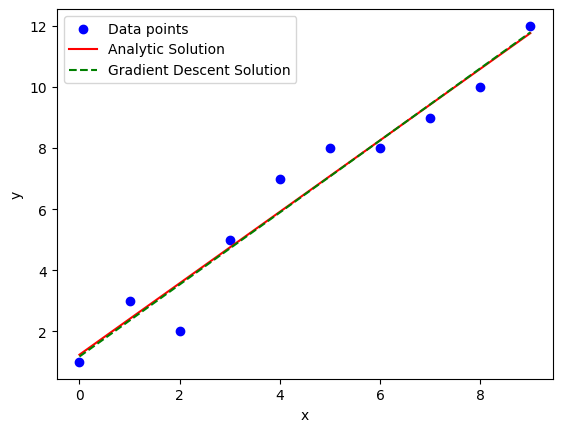

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x_values = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_values = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Number of data points
num_points = len(x_values)

# Means of x and y
mean_x = np.mean(x_values)
mean_y = np.mean(y_values)

# Calculating coefficients for the analytic solution
numerator = np.sum((x_values - mean_x) * (y_values - mean_y))
denominator = np.sum((x_values - mean_x) ** 2)
slope_analytic = numerator / denominator
intercept_analytic = mean_y - slope_analytic * mean_x

# Predictions using the analytic solution
predictions_analytic = intercept_analytic + slope_analytic * x_values

# Calculate SSE and R^2 for the analytic solution
sse_analytic = np.sum((y_values - predictions_analytic) ** 2)
sst_total = np.sum((y_values - mean_y) ** 2)
r_squared_analytic = 1 - sse_analytic / sst_total

print("Analytic Solution:")
print(f"Intercept (Beta 0): {intercept_analytic}")
print(f"Slope (Beta 1): {slope_analytic}")
print(f"SSE: {sse_analytic}")
print(f"R^2: {r_squared_analytic}")

# Gradient Descent initialization
intercept_gd = 0
slope_gd = 0
learning_rate = 0.01
num_epochs = 1000

# Gradient Descent optimization
for epoch in range(num_epochs):
    predictions_gd = intercept_gd + slope_gd * x_values
    error = predictions_gd - y_values
    intercept_gd -= learning_rate * (1/num_points) * np.sum(error)
    slope_gd -= learning_rate * (1/num_points) * np.sum(error * x_values)

# Calculate SSE and R^2 for the Gradient Descent solution
predictions_gd_final = intercept_gd + slope_gd * x_values
sse_gd = np.sum((y_values - predictions_gd_final) ** 2)
r_squared_gd = 1 - sse_gd / sst_total

print("\nGradient Descent Solution:")
print(f"Intercept (Beta 0): {intercept_gd}")
print(f"Slope (Beta 1): {slope_gd}")
print(f"SSE: {sse_gd}")
print(f"R^2: {r_squared_gd}")

# Plotting the results
plt.scatter(x_values, y_values, color='blue', label='Data points')
plt.plot(x_values, predictions_analytic, color='red', label='Analytic Solution')
plt.plot(x_values, predictions_gd_final, color='green', linestyle='--', label='Gradient Descent Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Correlation Matrix:
 CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64
The attribute with the highest correlation with PRICE is: PRICE
Analytic Solution:
Intercept (Beta 0): 22.112541254125414
Slope (Beta 1): 2.743679870756823e-15
SSE: 3766919.597054973
R^2: -204.4666217372155

Gradient Descent Solution:
Intercept (Beta 0): 22.112541254125407
Slope (Beta 1): -5.076980273665129e-16
SSE: 3766919.597054973
R^2: -204.4666217372155


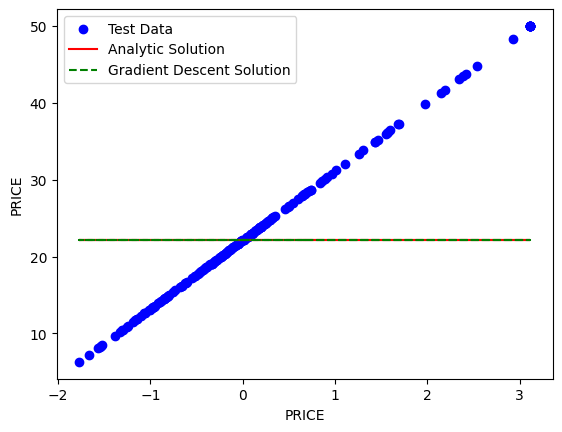

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data_matrix = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target_values = raw_df.values[1::2, 2]

df = pd.DataFrame(data=data_matrix, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target_values

correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix['PRICE'])

most_correlated_attribute = correlation_matrix['PRICE'].idxmax(axis=0)
print(f"The attribute with the highest correlation with PRICE is: {most_correlated_attribute}")

features = df[[most_correlated_attribute]].values
targets = df['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.4, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mean_X_train = np.mean(X_train_scaled)
mean_y_train = np.mean(y_train)

numerator = np.sum((X_train_scaled - mean_X_train) * (y_train - mean_y_train))
denominator = np.sum((X_train_scaled - mean_X_train) ** 2)
slope_analytic = numerator / denominator
intercept_analytic = mean_y_train - slope_analytic * mean_X_train

predictions_analytic = intercept_analytic + slope_analytic * X_test_scaled

SSE_analytic = np.sum((y_test - predictions_analytic) ** 2)
SST_total = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared_analytic = 1 - SSE_analytic / SST_total

print("Analytic Solution:")
print(f"Intercept (Beta 0): {intercept_analytic}")
print(f"Slope (Beta 1): {slope_analytic}")
print(f"SSE: {SSE_analytic}")
print(f"R^2: {r_squared_analytic}")

intercept_gd = 0
slope_gd = 0
learning_rate = 0.001
num_epochs = 1000

for epoch in range(num_epochs):
    predictions_gd = intercept_gd + slope_gd * X_train_scaled
    error_gd = predictions_gd - y_train
    intercept_gd -= learning_rate * (1/len(y_train)) * np.sum(error_gd)
    slope_gd -= learning_rate * (1/len(y_train)) * np.sum(error_gd * X_train_scaled)

predictions_gd_test = intercept_gd + slope_gd * X_test_scaled

SSE_gd = np.sum((y_test - predictions_gd_test) ** 2)
r_squared_gd = 1 - SSE_gd / SST_total

print("\nGradient Descent Solution:")
print(f"Intercept (Beta 0): {intercept_gd}")
print(f"Slope (Beta 1): {slope_gd}")
print(f"SSE: {SSE_gd}")
print(f"R^2: {r_squared_gd}")

plt.scatter(X_test_scaled, y_test, color='blue', label='Test Data')
plt.plot(X_test_scaled, predictions_analytic, color='red', label='Analytic Solution')
plt.plot(X_test_scaled, predictions_gd_test, color='green', linestyle='--', label='Gradient Descent Solution')
plt.xlabel(most_correlated_attribute)
plt.ylabel('PRICE')
plt.legend()
plt.show()
